here are my sources:
to generate the heatmap:
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
https://seaborn.pydata.org/examples/many_pairwise_correlations.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html

for colors on graphs:
https://seaborn.pydata.org/tutorial/color_palettes.html
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#load the data
df = pd.read_csv('IBM.csv')

In [4]:
#print all the columns
print(df.columns)


Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


In [5]:
#describe the data
print(df.describe())


               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009      

In [6]:
#print the first 5 rows
print(df.head(5))

   Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                

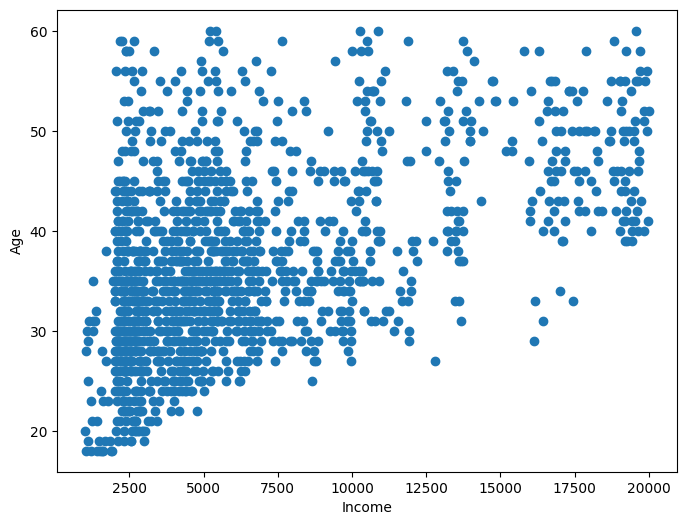

In [7]:
#plot income vs age
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlyIncome'], df['Age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


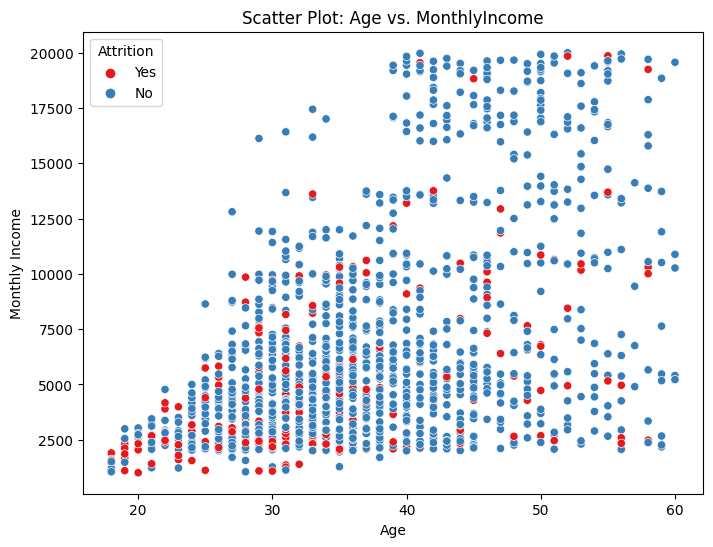

In [8]:
#Plot Age vs. MonthlyIncome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition', palette='Set1')
plt.title('Scatter Plot: Age vs. MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

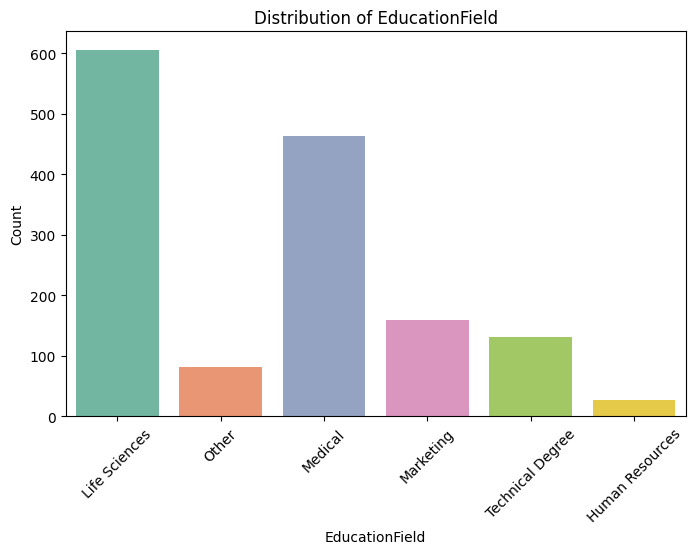

In [9]:
#plot count of EducationField
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='EducationField', palette='Set2')
plt.title('Distribution of EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
#correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                              Age  DistanceFromHome  Education  \
Age                      1.000000         -0.001686   0.208034   
DistanceFromHome        -0.001686          1.000000   0.021042   
Education                0.208034          0.021042   1.000000   
EnvironmentSatisfaction  0.010146         -0.016075  -0.027128   
JobSatisfaction         -0.004892         -0.003669  -0.011296   
MonthlyIncome            0.497855         -0.017014   0.094961   
NumCompaniesWorked       0.299635         -0.029251   0.126317   
WorkLifeBalance         -0.021490         -0.026556   0.009819   
YearsAtCompany           0.311309          0.009508   0.069114   

                         EnvironmentSatisfaction  JobSatisfaction  \
Age                                     0.010146        -0.004892   
DistanceFromHome                       -0.016075        -0.003669   
Education                              -0.027128        -0.011296   
EnvironmentSatisfaction                 1.000000        -0.0067

C:\Users\abakr\AppData\Local\Temp\ipykernel_12080\504540730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


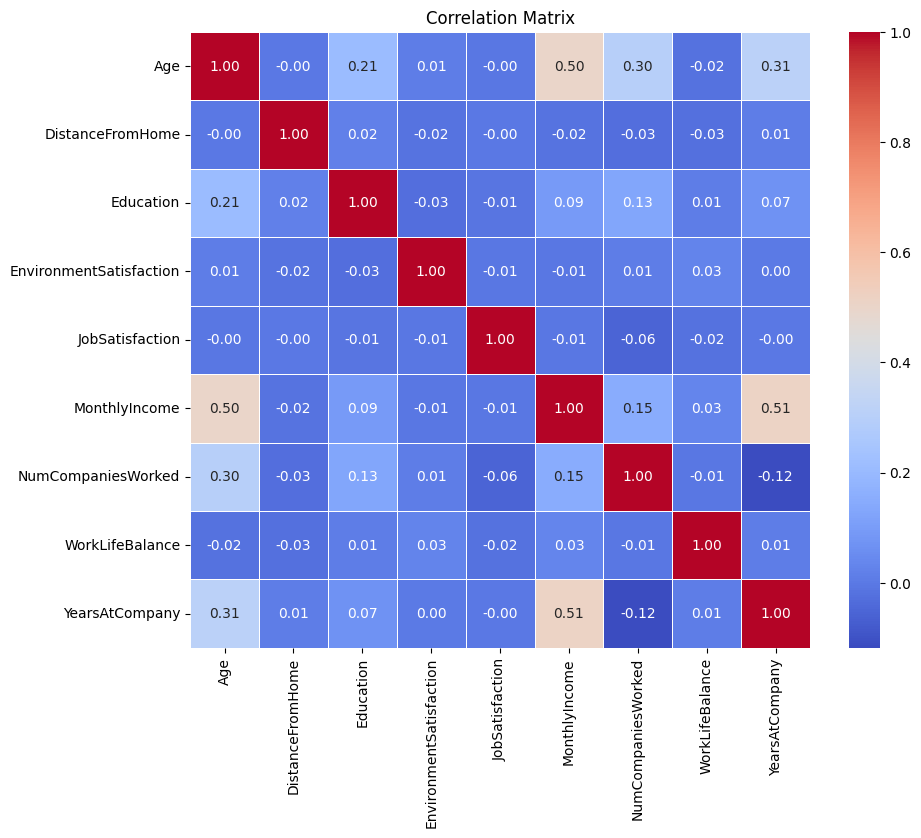

In [11]:
# Create a heatmap with color
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Set the title
plt.title('Correlation Matrix')
plt.show()

the age and monthly income have a correlation of 0.51, which is a moderate correlation.
number of years at the company and age have a correlation of 0.31, which is a weak correlation.
number of years at the company and monthly income have a correlation of 0.51, which is a moderate correlation.

# Preprocessing

In [12]:
#diffent values are there in the department column
print(df['Department'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [13]:
# drop the null values
df = df.dropna()
#drop the duplicates
df = df.drop_duplicates()

In [14]:
# Map each categories
attrition_mapping = {'Yes': 1, 'No': 0}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}

df['Attrition'] = df['Attrition'].map(attrition_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(marital_mapping)

#get dummies 
df = pd.get_dummies(df, columns=['Department', 'EducationField'], drop_first=True)


In [15]:
X = df[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 
        'JobSatisfaction', 'NumCompaniesWorked']] 

y = df['MonthlyIncome']

# MODELING

### EXPERIMENT 1

In [31]:

print(X.shape)


(1470, 17)


In [16]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Create a linear regression model and fit
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
#predict the test data
y_predict = regression_model.predict(X_test)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print('Linear Regression RMSE: ', rmse)

Linear Regression RMSE:  4346.036803517903


In [20]:
#accuracy
r2 = r2_score(y_test, y_predict)
print('Linear Regression Accuracy: ', r2)

Linear Regression Accuracy:  0.2750936960188374


### EXPERIMENT 2

In [21]:
X = df[['Age', 'Education','YearsAtCompany', 'NumCompaniesWorked']] 
y = df['MonthlyIncome']
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [22]:
#fit the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)  


LinearRegression()

In [23]:
y_predict = regression_model.predict(X_test)
#print the rmse
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print('Linear Regression RMSE: ', rmse)

Linear Regression RMSE:  3770.313481913062


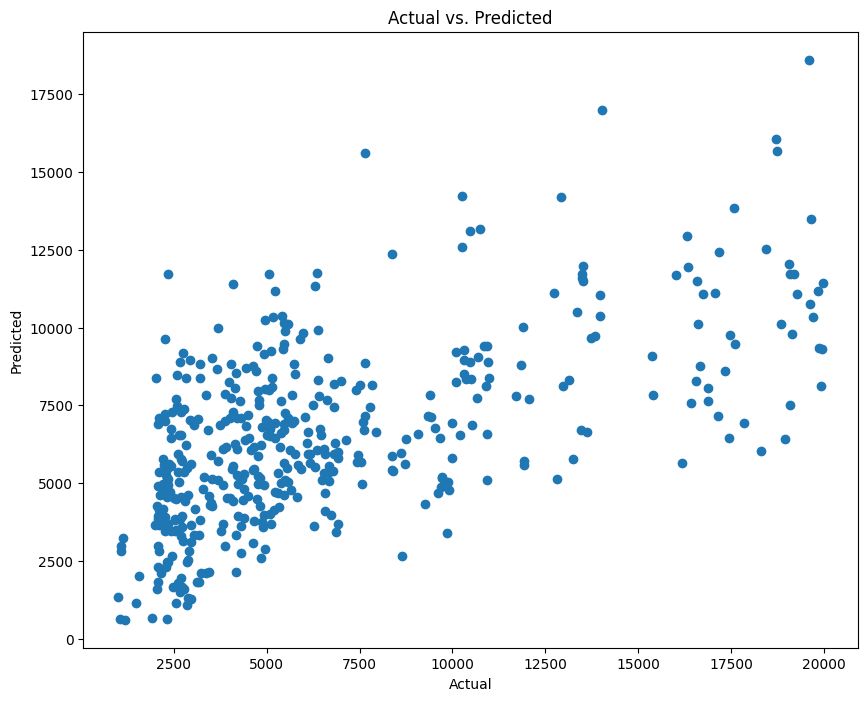

In [24]:
#graph
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [25]:
#accuracy
r2 = r2_score(y_test, y_predict)
print('Linear Regression Accuracy: ', r2)

Linear Regression Accuracy:  0.3828056076212034


## Experiment 3

In [52]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



In [47]:
X = df.drop(columns=['MonthlyIncome'])  # Features
y = df['MonthlyIncome']  # Target variable



#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
#fit the model
mod = RandomForestRegressor(max_depth=2, random_state=25)
mod.fit(X_train, y_train)
# Make predictions on the test set
y_predict = mod.predict(X_test)


In [56]:
#evaluate the model
r2 = r2_score(y_test, y_predict)
print('Random Forest Accuracy: ', r2)   
#rmse
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print('Random Forest RMSE: ', rmse)




Random Forest Accuracy:  0.3102429102480704
Random Forest RMSE:  3764.8350985356324
